<a href="https://colab.research.google.com/github/chathasphere/chathasphere.github.io/blob/main/teaching/306_materials/003_lab4_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Wrapping up dplyr Operations

## February 1st, 2022

In [1]:
library(tidyverse)
options(repr.plot.height=4) 

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# 1. dplyr Loose Ends
### review of `select`, `mutate`, `summarise`
### & introducing a few more simple commands

These are a family of "one table verbs" in dplyr. (Joins are an example of a "two table verb.")
For reference: https://dplyr.tidyverse.org/reference/index.html#section-one-table-verbs

In [ ]:
str(midwest)

tibble [437 × 28] (S3: tbl_df/tbl/data.frame)
 $ PID                 : int [1:437] 561 562 563 564 565 566 567 568 569 570 ...
 $ county              : chr [1:437] "ADAMS" "ALEXANDER" "BOND" "BOONE" ...
 $ state               : chr [1:437] "IL" "IL" "IL" "IL" ...
 $ area                : num [1:437] 0.052 0.014 0.022 0.017 0.018 0.05 0.017 0.027 0.024 0.058 ...
 $ poptotal            : int [1:437] 66090 10626 14991 30806 5836 35688 5322 16805 13437 173025 ...
 $ popdensity          : num [1:437] 1271 759 681 1812 324 ...
 $ popwhite            : int [1:437] 63917 7054 14477 29344 5264 35157 5298 16519 13384 146506 ...
 $ popblack            : int [1:437] 1702 3496 429 127 547 50 1 111 16 16559 ...
 $ popamerindian       : int [1:437] 98 19 35 46 14 65 8 30 8 331 ...
 $ popasian            : int [1:437] 249 48 16 150 5 195 15 61 23 8033 ...
 $ popother            : int [1:437] 124 9 34 1139 6 221 0 84 6 1596 ...
 $ percwhite           : num [1:437] 96.7 66.4 96.6 95.3 90.2 ...
 $ percbl


## 1.1 Select

Used for returning specific columns or columns that match a logical criterion.

In [ ]:
midwest %>% select(popwhite, popblack) %>% head

popwhite,popblack
<int>,<int>
63917,1702
7054,3496
14477,429
29344,127
5264,547
35157,50


In [ ]:
midwest %>% select(where(is.character)) %>% head

county,state,category
<chr>,<chr>,<chr>
ADAMS,IL,AAR
ALEXANDER,IL,LHR
BOND,IL,AAR
BOONE,IL,ALU
BROWN,IL,AAR
BUREAU,IL,AAR


## 1.2 Rename

We can also use `select` to rename columns, though there is a designated operation `rename` that accomplishes this *without* losing the other columns.

In [ ]:
# renaming with select keeps only the renamed column
midwest %>% select(percentage_white = percwhite) %>% head()

percentage_white
<dbl>
96.71206
66.38434
96.57128
95.25417
90.19877
98.51210


In [ ]:
# renaming with rename keeps everything
midwest %>% rename(percentage_white = percwhite) %>% select(starts_with("perc")) %>%
  head

percentage_white,percblack,percamerindan,percasian,percother,perchsd,percollege,percprof,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
96.71206,2.5752761,0.1482826,0.37675897,0.18762294,75.10740,19.63139,4.355859,96.27478,13.151443,18.01172,11.009776,12.443812
66.38434,32.9004329,0.1788067,0.45172219,0.08469791,59.72635,11.24331,2.870315,99.08714,32.244278,45.82651,27.385647,25.228976
96.57128,2.8617170,0.2334734,0.10673071,0.22680275,69.33499,17.03382,4.488572,94.95697,12.068844,14.03606,10.852090,12.697410
95.25417,0.4122574,0.1493216,0.48691813,3.69733169,75.47219,17.27895,4.197800,98.47757,7.209019,11.17954,5.536013,6.217047
90.19877,9.3728581,0.2398903,0.08567512,0.10281014,68.86152,14.47600,3.367680,82.50514,13.520249,13.02289,11.143211,19.200000
98.51210,0.1401031,0.1821340,0.54640215,0.61925577,76.62941,18.90462,3.275891,98.37200,10.399635,14.15882,8.179287,11.008586


The function `rename_with` lets you apply a (string) function to all columns by default or a specific subset

In [ ]:
toupper("cat")

[1] "CAT"

In [ ]:
# capitalize all columns
midwest %>% rename_with(toupper) %>% str

tibble [437 × 28] (S3: tbl_df/tbl/data.frame)
 $ PID                 : int [1:437] 561 562 563 564 565 566 567 568 569 570 ...
 $ COUNTY              : chr [1:437] "ADAMS" "ALEXANDER" "BOND" "BOONE" ...
 $ STATE               : chr [1:437] "IL" "IL" "IL" "IL" ...
 $ AREA                : num [1:437] 0.052 0.014 0.022 0.017 0.018 0.05 0.017 0.027 0.024 0.058 ...
 $ POPTOTAL            : int [1:437] 66090 10626 14991 30806 5836 35688 5322 16805 13437 173025 ...
 $ POPDENSITY          : num [1:437] 1271 759 681 1812 324 ...
 $ POPWHITE            : int [1:437] 63917 7054 14477 29344 5264 35157 5298 16519 13384 146506 ...
 $ POPBLACK            : int [1:437] 1702 3496 429 127 547 50 1 111 16 16559 ...
 $ POPAMERINDIAN       : int [1:437] 98 19 35 46 14 65 8 30 8 331 ...
 $ POPASIAN            : int [1:437] 249 48 16 150 5 195 15 61 23 8033 ...
 $ POPOTHER            : int [1:437] 124 9 34 1139 6 221 0 84 6 1596 ...
 $ PERCWHITE           : num [1:437] 96.7 66.4 96.6 95.3 90.2 ...
 $ PERCBL

In [ ]:
# as an example
midwest %>% mutate(county = tolower(county)) %>% head(10)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,adams,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,alexander,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,bond,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,boone,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,brown,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,bureau,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR
567,calhoun,IL,0.017,5322,313.0588,5298,1,8,15,⋯,11.91739,3.209601,5241,98.47802,15.149781,13.78776,12.932331,21.085271,0,LAR
568,carroll,IL,0.027,16805,622.4074,16519,111,30,61,⋯,16.19712,3.055727,16455,97.91729,11.710726,17.22546,10.027037,9.525052,0,AAR
569,cass,IL,0.024,13437,559.8750,13384,16,8,23,⋯,14.10765,3.206799,13081,97.35060,13.875086,17.99478,11.914343,13.660180,0,AAR


In [ ]:
# capitalize only columns of chr (string) type
midwest %>% rename_with(toupper, where(is.character)) %>% str
# first arg: function used for renaming
# second arg: logical criterion: which columns to rename
# (defaults to all columns)

tibble [437 × 28] (S3: tbl_df/tbl/data.frame)
 $ PID                 : int [1:437] 561 562 563 564 565 566 567 568 569 570 ...
 $ COUNTY              : chr [1:437] "ADAMS" "ALEXANDER" "BOND" "BOONE" ...
 $ STATE               : chr [1:437] "IL" "IL" "IL" "IL" ...
 $ area                : num [1:437] 0.052 0.014 0.022 0.017 0.018 0.05 0.017 0.027 0.024 0.058 ...
 $ poptotal            : int [1:437] 66090 10626 14991 30806 5836 35688 5322 16805 13437 173025 ...
 $ popdensity          : num [1:437] 1271 759 681 1812 324 ...
 $ popwhite            : int [1:437] 63917 7054 14477 29344 5264 35157 5298 16519 13384 146506 ...
 $ popblack            : int [1:437] 1702 3496 429 127 547 50 1 111 16 16559 ...
 $ popamerindian       : int [1:437] 98 19 35 46 14 65 8 30 8 331 ...
 $ popasian            : int [1:437] 249 48 16 150 5 195 15 61 23 8033 ...
 $ popother            : int [1:437] 124 9 34 1139 6 221 0 84 6 1596 ...
 $ percwhite           : num [1:437] 96.7 66.4 96.6 95.3 90.2 ...
 $ percbl

## 1.3 Mutate

Apply a function to an old column to obtain a new one

In [ ]:
midwest %>% mutate(county = tolower(county)) %>% select(county, state) %>% head

county,state
<chr>,<chr>
adams,IL
alexander,IL
bond,IL
boone,IL
brown,IL
bureau,IL


In [ ]:
midwest %>% mutate(lowercase_county = tolower(county)) %>% select(county, state, lowercase_county) %>% head

county,state,lowercase_county
<chr>,<chr>,<chr>
ADAMS,IL,adams
ALEXANDER,IL,alexander
BOND,IL,bond
BOONE,IL,boone
BROWN,IL,brown
BUREAU,IL,bureau


In [ ]:
midwest %>% mutate(logpop = log(poptotal)) %>% select(1:5, 29) %>% head

PID,county,state,area,poptotal,logpop
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>
561,ADAMS,IL,0.052,66090,11.098773
562,ALEXANDER,IL,0.014,10626,9.271059
563,BOND,IL,0.022,14991,9.615205
564,BOONE,IL,0.017,30806,10.335465
565,BROWN,IL,0.018,5836,8.671801
566,BUREAU,IL,0.050,35688,10.482570


In [ ]:
midwest %>% mutate(logpop = log(poptotal)) %>% arrange(desc(logpop)) %>% select(1:5, 29) %>% head


PID,county,state,area,poptotal,logpop
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>
576,COOK,IL,0.058,5105067,15.44574
1278,WAYNE,MI,0.035,2111687,14.56300
2026,CUYAHOGA,OH,0.026,1412140,14.16062
1259,OAKLAND,MI,0.055,1083592,13.89579
2033,FRANKLIN,OH,0.034,961437,13.77618
3021,MILWAUKEE,WI,0.015,959275,13.77393


We didn't go over this last time, but it's possible to apply the same mutation to multiple columns. This gets syntactically a bit confusing...

In [ ]:
# linear regression
lm(dataset, Y ~ predictor1 + predictor2 + whateber)

In [ ]:
# write a helper function
divide_by_100 <- function(x) {
  return (x / 100)
}

In [ ]:
divide_by_100(50)

[1] 0.5

In [ ]:
# alternative way of accomplishing the same
midwest %>% mutate(across(starts_with("perc"), divide_by_100)) %>% select(starts_with("perc")) %>% head

percwhite,percblack,percamerindan,percasian,percother,perchsd,percollege,percprof,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9671206,0.025752761,0.001482826,0.0037675897,0.0018762294,0.7510740,0.1963139,0.04355859,0.9627478,0.13151443,0.1801172,0.11009776,0.12443812
0.6638434,0.329004329,0.001788067,0.0045172219,0.0008469791,0.5972635,0.1124331,0.02870315,0.9908714,0.32244278,0.4582651,0.27385647,0.25228976
0.9657128,0.028617170,0.002334734,0.0010673071,0.0022680275,0.6933499,0.1703382,0.04488572,0.9495697,0.12068844,0.1403606,0.10852090,0.12697410
0.9525417,0.004122574,0.001493216,0.0048691813,0.0369733169,0.7547219,0.1727895,0.04197800,0.9847757,0.07209019,0.1117954,0.05536013,0.06217047
0.9019877,0.093728581,0.002398903,0.0008567512,0.0010281014,0.6886152,0.1447600,0.03367680,0.8250514,0.13520249,0.1302289,0.11143211,0.19200000
0.9851210,0.001401031,0.001821341,0.0054640215,0.0061925577,0.7662941,0.1890462,0.03275891,0.9837200,0.10399635,0.1415882,0.08179287,0.11008586


In [ ]:
midwest %>% mutate(across(starts_with("perc"), ~ . / 100)) %>% select(starts_with("perc")) %>% head

percwhite,percblack,percamerindan,percasian,percother,perchsd,percollege,percprof,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9671206,0.025752761,0.001482826,0.0037675897,0.0018762294,0.7510740,0.1963139,0.04355859,0.9627478,0.13151443,0.1801172,0.11009776,0.12443812
0.6638434,0.329004329,0.001788067,0.0045172219,0.0008469791,0.5972635,0.1124331,0.02870315,0.9908714,0.32244278,0.4582651,0.27385647,0.25228976
0.9657128,0.028617170,0.002334734,0.0010673071,0.0022680275,0.6933499,0.1703382,0.04488572,0.9495697,0.12068844,0.1403606,0.10852090,0.12697410
0.9525417,0.004122574,0.001493216,0.0048691813,0.0369733169,0.7547219,0.1727895,0.04197800,0.9847757,0.07209019,0.1117954,0.05536013,0.06217047
0.9019877,0.093728581,0.002398903,0.0008567512,0.0010281014,0.6886152,0.1447600,0.03367680,0.8250514,0.13520249,0.1302289,0.11143211,0.19200000
0.9851210,0.001401031,0.001821341,0.0054640215,0.0061925577,0.7662941,0.1890462,0.03275891,0.9837200,0.10399635,0.1415882,0.08179287,0.11008586


Breaking down the syntax above...
* `across`: specifies a set of columns to mutate
* `~` indicates the start of a formula to apply across several columns
* `.` dummy variable standing in for each column

How about renaming the percentage columns (since they're no longer percentages)?

In [ ]:
str_replace_all("The quick brown fox", pattern=" ", "_")

[1] "The_quick_brown_fox"

In [ ]:
str_replace("bob", pattern="o", replace="i")

[1] "bib"

In [ ]:
midwest_scaled <- midwest %>%
   mutate(across(starts_with("perc"), ~ . / 100))
midwest_scaled %>% rename_with(~ str_replace(., pattern="perc", replacement = "prop_")) %>%
  select(starts_with("prop_")) %>% head

prop_white,prop_black,prop_amerindan,prop_asian,prop_other,prop_hsd,prop_ollege,prop_prof,prop_povertyknown,prop_belowpoverty,prop_childbelowpovert,prop_adultpoverty,prop_elderlypoverty
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.9671206,0.025752761,0.001482826,0.0037675897,0.0018762294,0.7510740,0.1963139,0.04355859,0.9627478,0.13151443,0.1801172,0.11009776,0.12443812
0.6638434,0.329004329,0.001788067,0.0045172219,0.0008469791,0.5972635,0.1124331,0.02870315,0.9908714,0.32244278,0.4582651,0.27385647,0.25228976
0.9657128,0.028617170,0.002334734,0.0010673071,0.0022680275,0.6933499,0.1703382,0.04488572,0.9495697,0.12068844,0.1403606,0.10852090,0.12697410
0.9525417,0.004122574,0.001493216,0.0048691813,0.0369733169,0.7547219,0.1727895,0.04197800,0.9847757,0.07209019,0.1117954,0.05536013,0.06217047
0.9019877,0.093728581,0.002398903,0.0008567512,0.0010281014,0.6886152,0.1447600,0.03367680,0.8250514,0.13520249,0.1302289,0.11143211,0.19200000
0.9851210,0.001401031,0.001821341,0.0054640215,0.0061925577,0.7662941,0.1890462,0.03275891,0.9837200,0.10399635,0.1415882,0.08179287,0.11008586


Annoyingly, they decided to name the column `percollege` instead of `perccollege.`

I personally find the documentation for `mutate` unhelpful...Google searches and StackOverflow are your friends here (and of course you can ask the GSI team for help!)

## 1.4 Summarise

Not very useful on its own, `summarise` shines when we are grouping data.

In [ ]:
midwest %>% group_by(state) %>% summarise(pop = sum(poptotal)) %>% 
  mutate(pop_millions = pop / 1000000) %>% arrange(desc(pop))

state,pop,pop_millions
<chr>,<int>,<dbl>
IL,11430602,11.430602
OH,10847115,10.847115
MI,9295297,9.295297
IN,5544159,5.544159
WI,4891769,4.891769


In [ ]:
midwest %>% group_by(state) %>% summarise(area = sum(area), pop = sum(poptotal)) %>%
  mutate(pop_density = (pop / 1000) / area) %>% arrange(pop_density)

state,area,pop,pop_density
<chr>,<dbl>,<int>,<dbl>
WI,3.286,4891769,1488.670
IN,2.127,5544159,2606.563
MI,3.357,9295297,2768.930
IL,3.304,11430602,3459.625
OH,2.421,10847115,4480.428


In [ ]:
# this is a bad idea
midwest %>% mutate(pop_density = (poptotal / 1000) / area) %>% group_by(state) %>%
  summarise(total_density = sum(pop_density))

state,total_density
<chr>,<dbl>
IL,288020.5
IN,236727.9
MI,249897.1
OH,408234.1
WI,170834.0


In [ ]:
midwest %>% group_by(state) %>% summarise(n_counties = n())

state,n_counties
<chr>,<int>
IL,102
IN,92
MI,83
OH,88
WI,72


In [ ]:
midwest %>% group_by(state) %>% summarise(n_categories = n_distinct(category))

state,n_categories
<chr>,<int>
IL,11
IN,12
MI,10
OH,12
WI,10


In [ ]:
midwest %>% group_by(category) %>% summarise(med_density = median(popdensity)) %>%
  arrange(med_density)

category,med_density
<chr>,<dbl>
AHR,619.7192
LHR,695.1158
AAR,768.8679
LAR,795.4790
HAR,857.2037
HHR,1036.5882
LAU,1170.4828
HLR,1367.9923
ALR,1408.3077


It's somewhat mysterious what these categories mean, since quoting the docs, "The original descriptions were not documented and the current descriptions here are based on speculation." Cool cool cool.

## 1.5 Count

An alternative way of getting a quick count of rows per group.

In [ ]:
midwest %>% count(state)

state,n
<chr>,<int>
IL,102
IN,92
MI,83
OH,88
WI,72


In [ ]:
# equivalent to
midwest %>% group_by(state) %>% summarise(n = n())

state,n
<chr>,<int>
IL,102
IN,92
MI,83
OH,88
WI,72


## 1.6 Slice

Similar to filter, except you return rows by specific indices and not logical criteria.

In [ ]:
midwest %>% slice(c(100, 102, 160, 200))

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
660,WILLIAMSON,IL,0.025,57733,2309.320,56135,1147,112,252,⋯,21.05956,4.980249,56318,97.54906,15.801342,22.394582,13.618817,13.819785,0,AAR
662,WOODFORD,IL,0.032,32653,1020.406,32388,64,54,102,⋯,22.80522,4.973374,31693,97.05999,7.187707,10.013923,5.628350,7.150557,1,HLU
720,OHIO,IN,0.005,5315,1063.000,5255,41,8,9,⋯,10.70292,1.793463,5271,99.17215,9.884272,8.626887,8.583981,15.960912,1,LAU
1202,ARENAC,MI,0.021,14931,711.000,14695,10,139,38,⋯,11.82785,2.586383,14664,98.21177,20.649209,28.951368,18.232337,16.054465,0,LHR


# 2. Visualization/ Exercises

Exercise 1: Create a bar plot of population per state, with each bar stacked by category

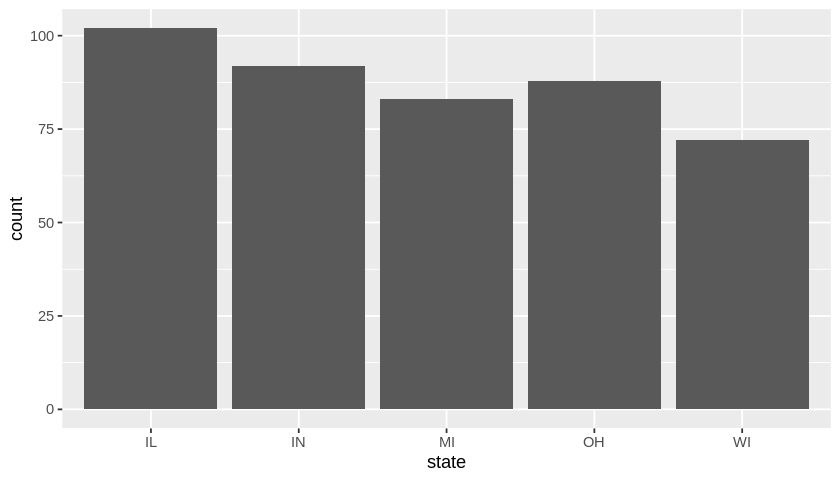

In [ ]:
# your code here
ggplot(midwest) + 
  geom_bar(aes(x=state))

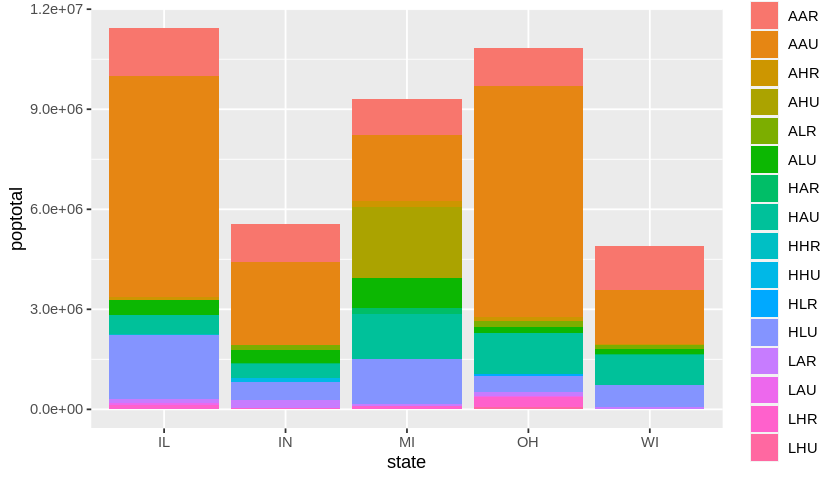

In [ ]:
# your code here
ggplot(midwest) + 
  geom_col(aes(x=state, y=poptotal, fill=category))

Exercise 2: Plot the relationship between adult poverty and percentage of college grads on the log10 scale, coloring by state.

In [2]:
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


`geom_smooth()` using formula 'y ~ x'



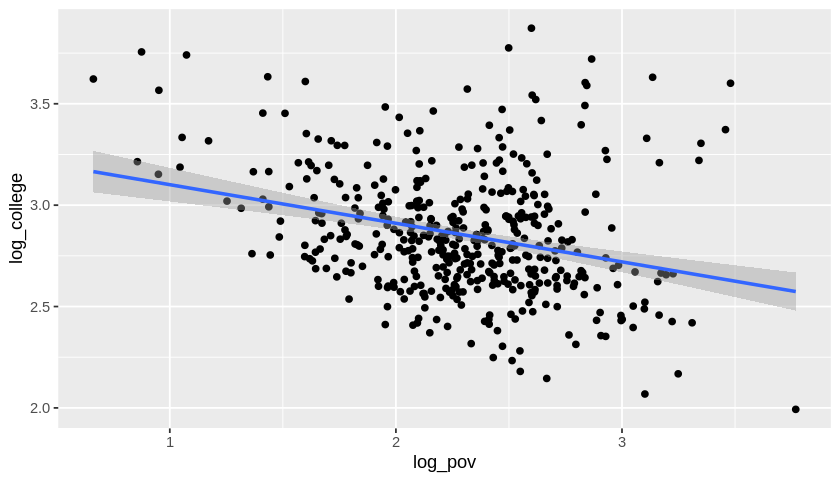

In [8]:
midwest_scaled <- midwest %>% 
  mutate(log_pov = log(percadultpoverty), log_college = log(percollege))

ggplot(midwest_scaled, aes(x = log_pov, y = log_college)) + geom_point() + 
  geom_smooth(method="lm")

Exercise 3a: Create a new factor column called `poverty_level` with levels:
* "critical" if poverty rate is above 25%
* "severe" if poverty rate is between 15% and 25% 
* "normal" otherwise.

Hint: use either the `cut` function with appropriate breaks and labels, or else write your own binning function and apply it with `mutate`.

In [19]:
midwest_binned <- midwest %>% 
  mutate(poverty_level = cut(
    percbelowpoverty, breaks=c(0, 15, 25, 100), labels=c("normal", "severe", "critical"))
  )
  
midwest_binned %>% select(county, state, poverty_level) %>% sample_n(10)

county,state,poverty_level
<chr>,<chr>,<fct>
FRANKLIN,IL,severe
POPE,IL,critical
ATHENS,OH,critical
PULASKI,IN,normal
HIGHLAND,OH,severe
FOND DU LAC,WI,normal
BROWN,WI,normal
GREEN,WI,normal
COOK,IL,normal


Exercise 3b: Visualize a racial breakdown of counties in each of these levels. For instance, you could do a proportional barplot based on percentage of each race, or a `geom_col` plot as in exercise 1 that is stacked by race.

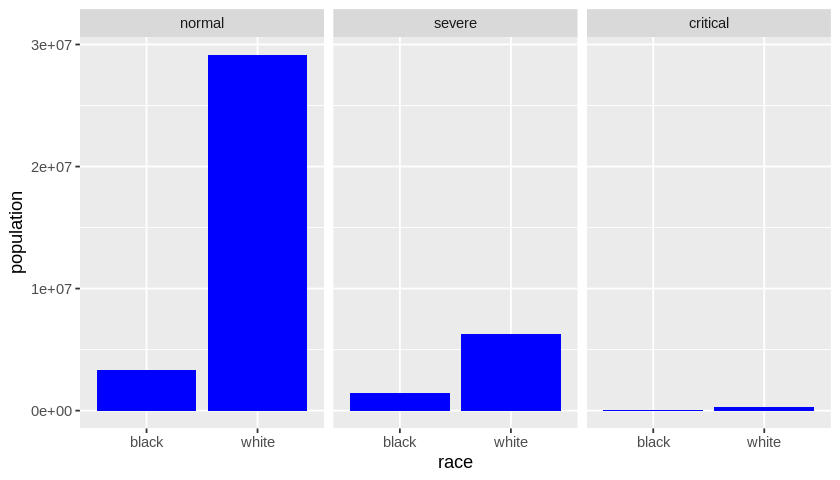

In [31]:
# note: I realized that this problem most likely requires a "pivot"
# since each race is listed as a separate column.

midwest_pivoted <- midwest_binned %>% group_by(poverty_level) %>%
  summarise(white = sum(popwhite), black = sum(popblack)) %>%
  # move from a "wide" table to a "long" table
  # each race column becomes a row
  pivot_longer(!poverty_level, names_to="race", values_to="population")

ggplot(midwest_pivoted, aes(x=race, y=population)) + geom_col(fill="blue") + 
  facet_wrap(~ poverty_level, ncol=3)

Exercise 4: Create tibbles corresponding to the 40 counties with the highest population density and lowest population density. Choose two variables for a scatter plot (such as adult poverty and percent college grads) and visually compare the relationship for the most dense and least dense counties.

In [32]:
head(midwest)

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.151443,18.01172,11.009776,12.443812,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.244278,45.82651,27.385647,25.228976,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.068844,14.03606,10.852090,12.697410,0,AAR
564,BOONE,IL,0.017,30806,1812.1176,29344,127,46,150,⋯,17.27895,4.197800,30337,98.47757,7.209019,11.17954,5.536013,6.217047,1,ALU
565,BROWN,IL,0.018,5836,324.2222,5264,547,14,5,⋯,14.47600,3.367680,4815,82.50514,13.520249,13.02289,11.143211,19.200000,0,AAR
566,BUREAU,IL,0.050,35688,713.7600,35157,50,65,195,⋯,18.90462,3.275891,35107,98.37200,10.399635,14.15882,8.179287,11.008586,0,AAR


In [33]:
highest_density <- midwest %>% arrange(desc(popdensity)) %>% head(40)
lowest_density <- midwest %>% arrange(popdensity) %>% head(40)

`geom_smooth()` using formula 'y ~ x'



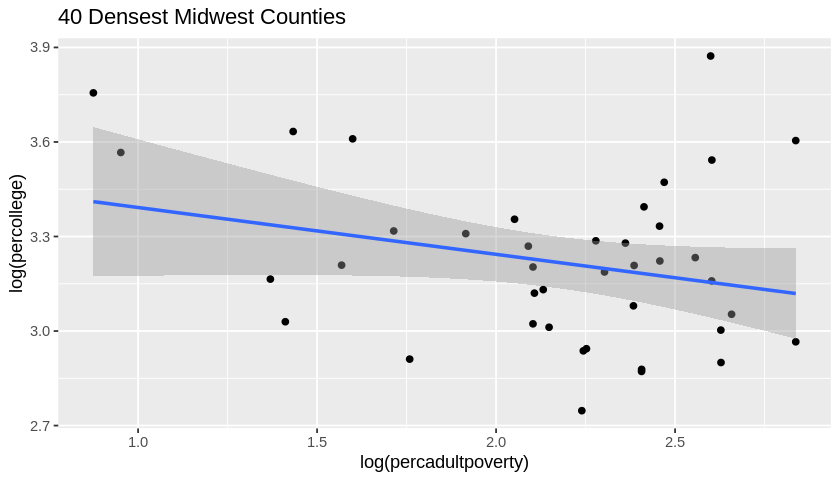

In [37]:
ggplot(highest_density, 
    aes(x = log(percadultpoverty), y = log(percollege))) + geom_point() + 
    geom_smooth(method="lm") + ggtitle("40 Densest Midwest Counties")

`geom_smooth()` using formula 'y ~ x'



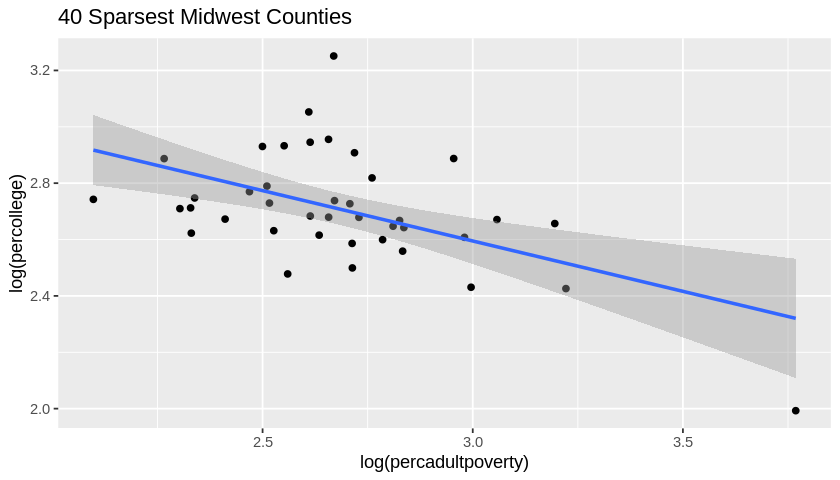

In [38]:
ggplot(lowest_density, 
    aes(x = log(percadultpoverty), y = log(percollege))) + geom_point() + 
    geom_smooth(method="lm") + ggtitle("40 Sparsest Midwest Counties")

Exercise 5: What do the categories mean? Try creating some grouped plots (e.g. stacked barplots, colored scatter plots) that shed some light on how county categories differ from one another.

*This exercise is open ended/ambiguous, but it's the sort of Data Science question that people work on in real life.*

In [40]:
str(midwest)

tibble [437 × 28] (S3: tbl_df/tbl/data.frame)
 $ PID                 : int [1:437] 561 562 563 564 565 566 567 568 569 570 ...
 $ county              : chr [1:437] "ADAMS" "ALEXANDER" "BOND" "BOONE" ...
 $ state               : chr [1:437] "IL" "IL" "IL" "IL" ...
 $ area                : num [1:437] 0.052 0.014 0.022 0.017 0.018 0.05 0.017 0.027 0.024 0.058 ...
 $ poptotal            : int [1:437] 66090 10626 14991 30806 5836 35688 5322 16805 13437 173025 ...
 $ popdensity          : num [1:437] 1271 759 681 1812 324 ...
 $ popwhite            : int [1:437] 63917 7054 14477 29344 5264 35157 5298 16519 13384 146506 ...
 $ popblack            : int [1:437] 1702 3496 429 127 547 50 1 111 16 16559 ...
 $ popamerindian       : int [1:437] 98 19 35 46 14 65 8 30 8 331 ...
 $ popasian            : int [1:437] 249 48 16 150 5 195 15 61 23 8033 ...
 $ popother            : int [1:437] 124 9 34 1139 6 221 0 84 6 1596 ...
 $ percwhite           : num [1:437] 96.7 66.4 96.6 95.3 90.2 ...
 $ percbl

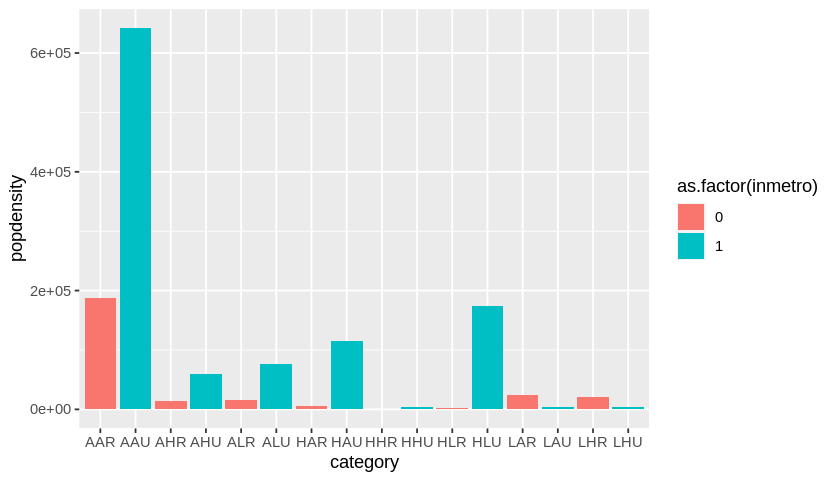

In [47]:
ggplot(midwest) + 
  geom_col(aes(x=category, y=popdensity, fill=as.factor(inmetro)))

In [55]:
midwest %>% group_by(as.factor(inmetro), category) %>%
  summarise(med_pov_rate = median(percadultpoverty),
        min_white = min(percwhite), max_logpop = max(log(poptotal))) %>% 
        arrange(max_logpop)

`summarise()` has grouped output by 'as.factor(inmetro)'. You can override using the `.groups` argument.


as.factor(inmetro),category,med_pov_rate,min_white,max_logpop
<fct>,<chr>,<dbl>,<dbl>,<dbl>
1,LAU,9.253834,96.29979,10.46213
0,HHR,22.403382,93.61026,10.47005
0,LAR,12.052805,90.15599,10.48369
0,AHR,18.147666,84.35230,11.01973
1,LHU,18.496825,97.21998,11.03221
0,HLR,5.565166,97.00317,11.09035
0,HAR,7.575173,95.96541,11.16884
0,ALR,5.253924,96.02515,11.24582
0,LHR,20.602200,10.69409,11.29386
